In [ ]:
# Imports
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
# from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score, RocCurveDisplay

In [ ]:
sept2013c3 = pd.read_csv('sept2013c3.csv')

X = sept2013c3.drop(columns=['Class'])
y = sept2013c3['Class']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
X_train_subsample = X_train.sample(n=60000, random_state=42)
y_train_subsample = y_train.loc[X_train_subsample.index]

print(pd.Series(y_train_subsample).value_counts())

Class
0    59916
1       84
Name: count, dtype: int64


In [ ]:
# SVM Model
svm_original = SVC(kernel='rbf', probability=True, 
                    C=1.0, gamma='scale', 
                    random_state=42, verbose=True)
svm_original.fit(X_train_subsample, y_train_subsample)

[LibSVM]

SVC(probability=True, random_state=42, verbose=True)

In [ ]:
# Eval of Predictions
y_pred_original = svm_original.predict(X_test)

print("\nPerformance on Original Dataset:")
print(confusion_matrix(y_test, y_pred_original))
print(classification_report(y_test, y_pred_original))

roc_auc_original = roc_auc_score(y_test, svm_original.predict_proba(X_test)[:, 1])
print(f"ROC-AUC Score: {roc_auc_original:.2f}")


Performance on Original Dataset:
[[56864     0]
 [   98     0]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.00      0.00      0.00        98

    accuracy                           1.00     56962
   macro avg       0.50      0.50      0.50     56962
weighted avg       1.00      1.00      1.00     56962



c:\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


ROC-AUC Score: 0.95


In [ ]:
# Apply SMOTE/Undersampling + Rescaling
under_sampler = RandomUnderSampler(sampling_strategy=.007, random_state=42)
X_resampled, y_resampled = under_sampler.fit_resample(X_train, y_train)

# Apply SMOTE
# smote = SMOTE(sampling_strategy=.009, random_state=42)
# X_resampled, y_resampled = smote.fit_resample(X_resampled, y_resampled)

print("\nResampled class distribution in y_resampled:")
print(pd.Series(y_resampled).value_counts())


Resampled class distribution in y_resampled:
Class
0    56285
1      394
Name: count, dtype: int64


In [8]:
# Model Training with Resampled Data
svm_resampled = SVC(kernel='rbf', probability=True, C=1.0, gamma='scale', random_state=42, verbose=True)
svm_resampled.fit(X_resampled, y_resampled)

[LibSVM]

SVC(probability=True, random_state=42, verbose=True)

In [9]:
# Evaluate Predictions of Resampled SVM Model

y_pred_resampled = svm_resampled.predict(X_test)

print("\nPerformance on Resampled Dataset:")
print(confusion_matrix(y_test, y_pred_resampled))
print(classification_report(y_test, y_pred_resampled))

roc_auc_resampled = roc_auc_score(y_test, svm_resampled.predict_proba(X_test)[:, 1])
print(f"ROC-AUC Score: {roc_auc_resampled:.2f}")


Performance on Resampled Dataset:
[[56855     9]
 [   53    45]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.83      0.46      0.59        98

    accuracy                           1.00     56962
   macro avg       0.92      0.73      0.80     56962
weighted avg       1.00      1.00      1.00     56962

ROC-AUC Score: 0.97


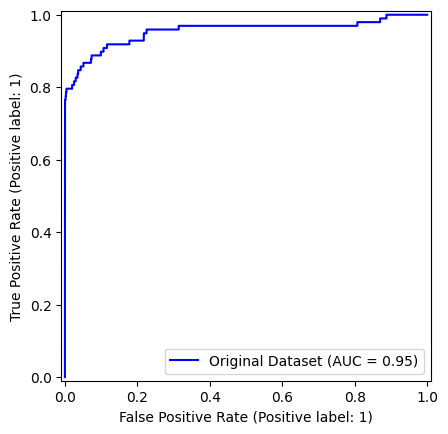

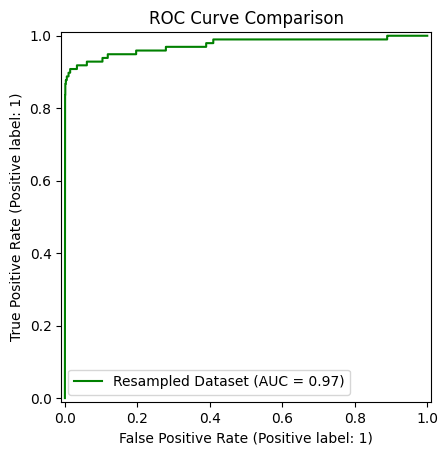

In [10]:
# Plot ROC Curves for Both Models
RocCurveDisplay.from_estimator(svm_original, X_test, y_test, name="Original Dataset", color="blue")
RocCurveDisplay.from_estimator(svm_resampled, X_test, y_test, name="Resampled Dataset", color="green")
plt.title("ROC Curve Comparison")
plt.legend()
plt.show()